In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

2024-06-06 18:40:13.136767: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-06 18:40:13.675795: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:

# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [3]:
# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu')
])

# Add Dense layers on top
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

# Print the model summary
model.summary()

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [4]:
# Train the model
history = model.fit(train_images, train_labels, epochs=25   , 
                    validation_data=(test_images, test_labels),callbacks=[early_stopping]) 

Epoch 1/25


2024-06-06 18:40:16.089871: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


1563/1563 [==============================] - 19s 11ms/step - loss: 1.5335 - accuracy: 0.4409 - val_loss: 1.3379 - val_accuracy: 0.5112
Epoch 2/25
1563/1563 [==============================] - 17s 11ms/step - loss: 1.1958 - accuracy: 0.5756 - val_loss: 1.0893 - val_accuracy: 0.6201
Epoch 3/25
1563/1563 [==============================] - 17s 11ms/step - loss: 1.0349 - accuracy: 0.6353 - val_loss: 1.0297 - val_accuracy: 0.6372
Epoch 4/25
1563/1563 [==============================] - 19s 12ms/step - loss: 0.9356 - accuracy: 0.6726 - val_loss: 0.9530 - val_accuracy: 0.6614
Epoch 5/25
1563/1563 [==============================] - 19s 12ms/step - loss: 0.8591 - accuracy: 0.6975 - val_loss: 0.9291 - val_accuracy: 0.6785
Epoch 6/25
1563/1563 [==============================] - 19s 12ms/step - loss: 0.7979 - accuracy: 0.7214 - val_loss: 0.9017 - val_accuracy: 0.6882
Epoch 7/25
1563/1563 [==============================] - 18s 12ms/step - loss: 0.7482 - accuracy: 0.7377 - val_loss: 0.8792 - val_accura

313/313 - 1s - loss: 0.8560 - accuracy: 0.7083 - 1s/epoch - 3ms/step

Test accuracy: 0.708299994468689


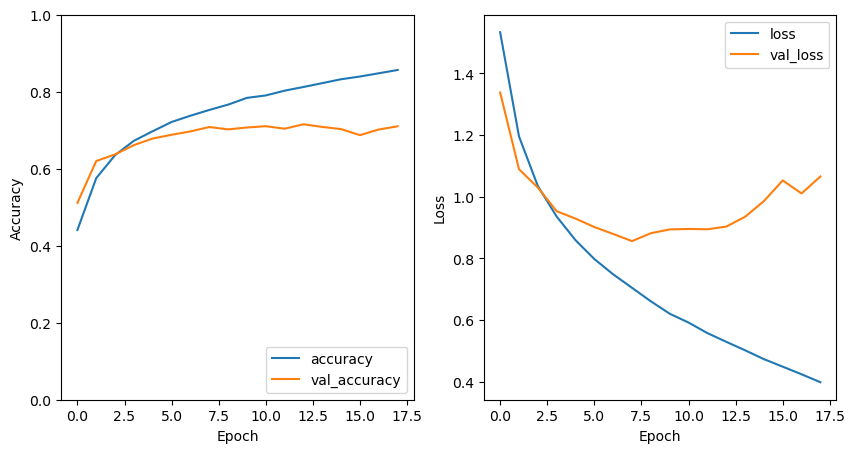

In [5]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest accuracy: {test_acc}")

# Plot training and validation accuracy and loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()
